In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'C:/Users/HP/Desktop/train_test_split_ext/sent3/images_rose_ext/train'
test_dir = 'C:/Users/HP/Desktop/train_test_split_ext/sent3/images_rose_ext/test'
validation_dir = 'C:/Users/HP/Desktop/train_test_split_ext/sent3/images_rose_ext/val'

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255
   
)

# Only rescaling for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # ResNet-50 expects 224x224 images
    batch_size=32,
    class_mode='binary'  # Binary classification
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle for evaluation
)



Found 2238 images belonging to 2 classes.
Found 482 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [3]:
# Load ResNet-50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  
)

C:\Users\HP\Documents\anaconda2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.4968 - loss: 0.7150 - val_accuracy: 0.5000 - val_loss: 0.6902
Epoch 2/20
 1/69 ━━━━━━━━━━━━━━━━━━━━ 1:38 1s/step - accuracy: 0.5625 - loss: 0.6816

C:\Users\HP\Documents\anaconda2\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 400ms/step - accuracy: 0.5625 - loss: 0.6816 - val_accuracy: 0.4979 - val_loss: 0.6906
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.5313 - loss: 0.6931 - val_accuracy: 0.5021 - val_loss: 0.7221
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5312 - loss: 0.7166 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.5226 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6884
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 44s 611ms/step - accuracy: 0.5312 - loss: 0.6871 - val_accuracy: 0.5000 - val_loss: 0.6864
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.5509 - loss: 0.6833 - val_accuracy: 0.5583 - val_loss: 0.6718
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 45s 621ms/step - accuracy: 0.5625 - loss: 0.6859 - val_accuracy: 0.6229 - val_loss: 0.6705
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.5685 - loss: 0.6801 - val_accuracy: 0.5708 - val_los

In [6]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8063 - loss: 0.5930
Test Loss: 0.6621931195259094
Test Accuracy: 0.5208333134651184


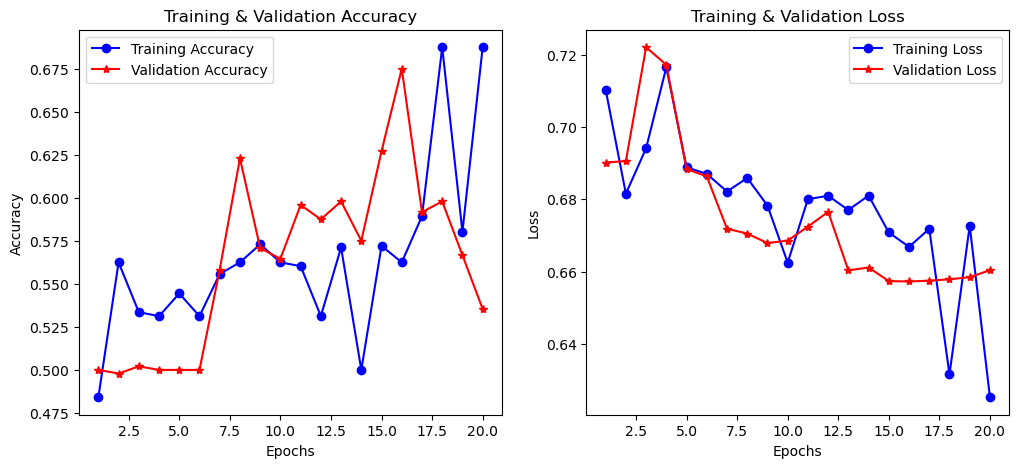

In [7]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    # Extract history data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')

    plt.show()

# Call the function
plot_history(history)
